## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK [09] : [Algoritma Partisi] </div>

#### <div align="center"> Semester Ganjil 2023/2024 </div>

In [1]:
import datetime
import uuid    

# Fill in your name and NIM
myName = "Steven Indriano"
myNIM = "57217"

myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

# Header
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Steven Indriano
NIM: 		57217
Start: 		2023-11-06 21:16:49.521384
Device ID: 	2020ed12-7caf-11ee-9eb1-f057a69a9c86



---

### Dataset yang dipakai:

1. [Customer Segmentation Classification] – sumber : [https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation]
2. [US Crime Rates 1960-2014] – sumber : [https://www.kaggle.com/datasets/mahmoudshogaa/us-crime-rates-1960-2014]

### Hasil kerja

In [2]:
# Your codes are here (replace the following codes)
import time

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

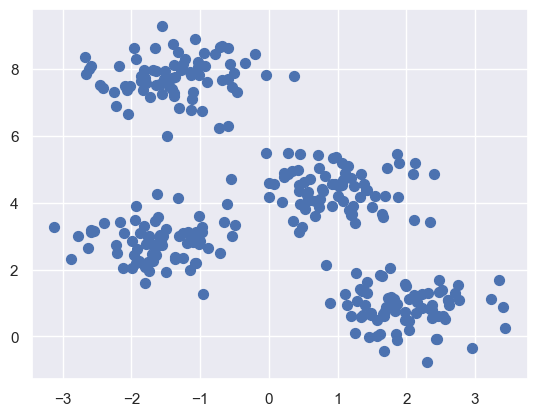

In [4]:
from sklearn.datasets import make_blobs 
import matplotlib.pyplot as plt

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()


In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

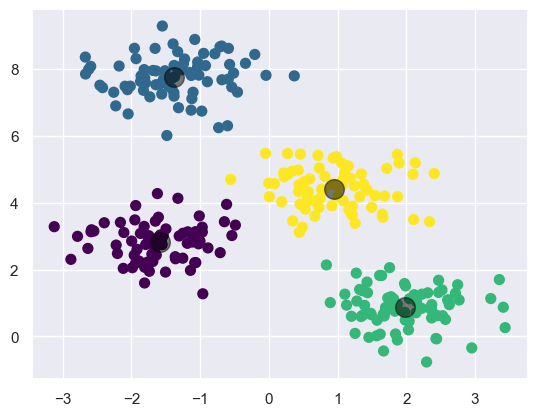

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

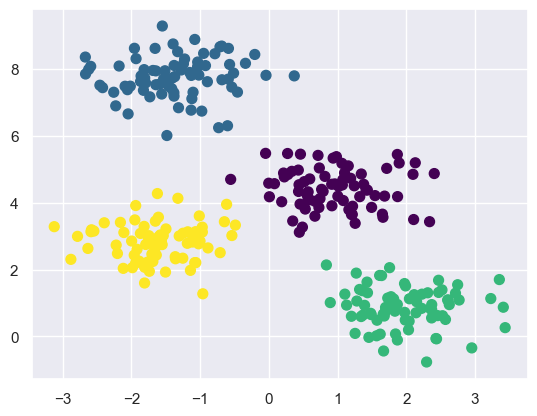

In [7]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng= np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0]) [:n_clusters]
    centers = X[i]
    
    while True:
        # a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                               for i in range(n_clusters)])
        
        # c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
        
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
           s=50, cmap='viridis');

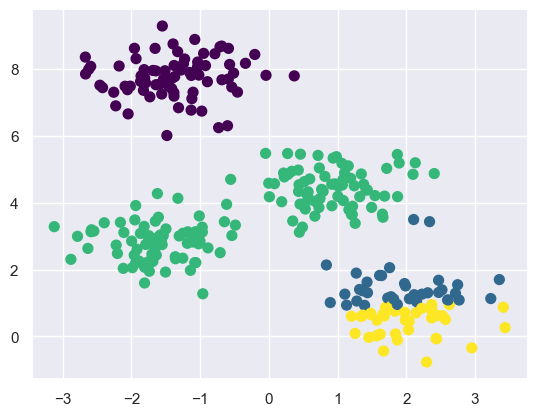

In [8]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,
           s=50, cmap='viridis');

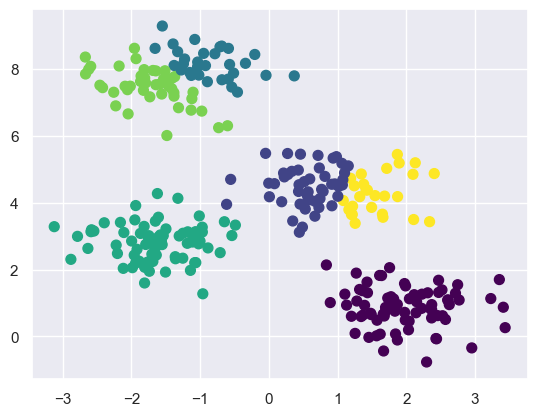

In [9]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
           s=50, cmap='viridis');

In [10]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.5, random_state=0)

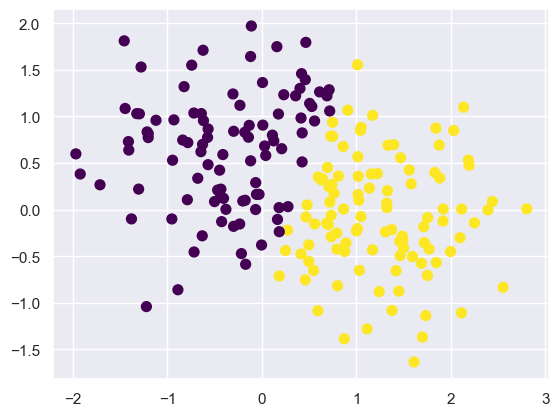

In [11]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
           s=50, cmap='viridis');

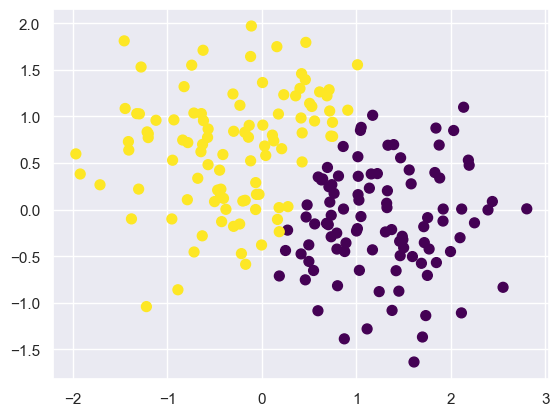

In [12]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                          assign_labels='kmeans')
labels = model.fit_predict (X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
           s=50, cmap='viridis');

In [13]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [14]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

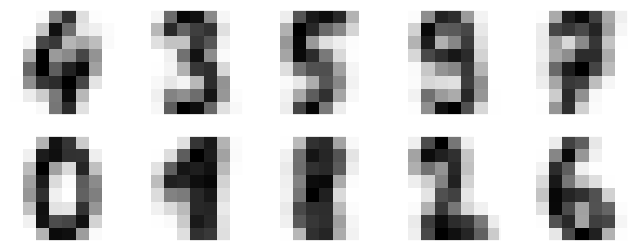

In [15]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip (ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [16]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

C:\Users\NB\AppData\Local\Temp\ipykernel_29900\1054570171.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(digits.target[mask])[0]


In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

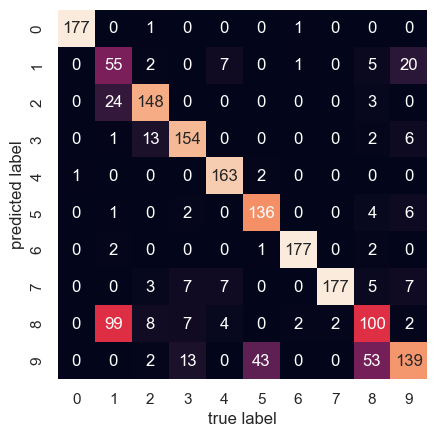

In [18]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=digits.target_names,
           yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

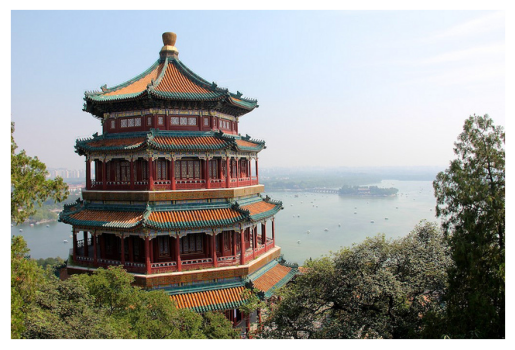

In [19]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [20]:
china.shape

(427, 640, 3)

In [21]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [22]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
        
    # Choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))  # Use keyword arguments for xlim and ylim

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))  # Use keyword arguments for xlim and ylim

    fig.suptitle(title, size=20)

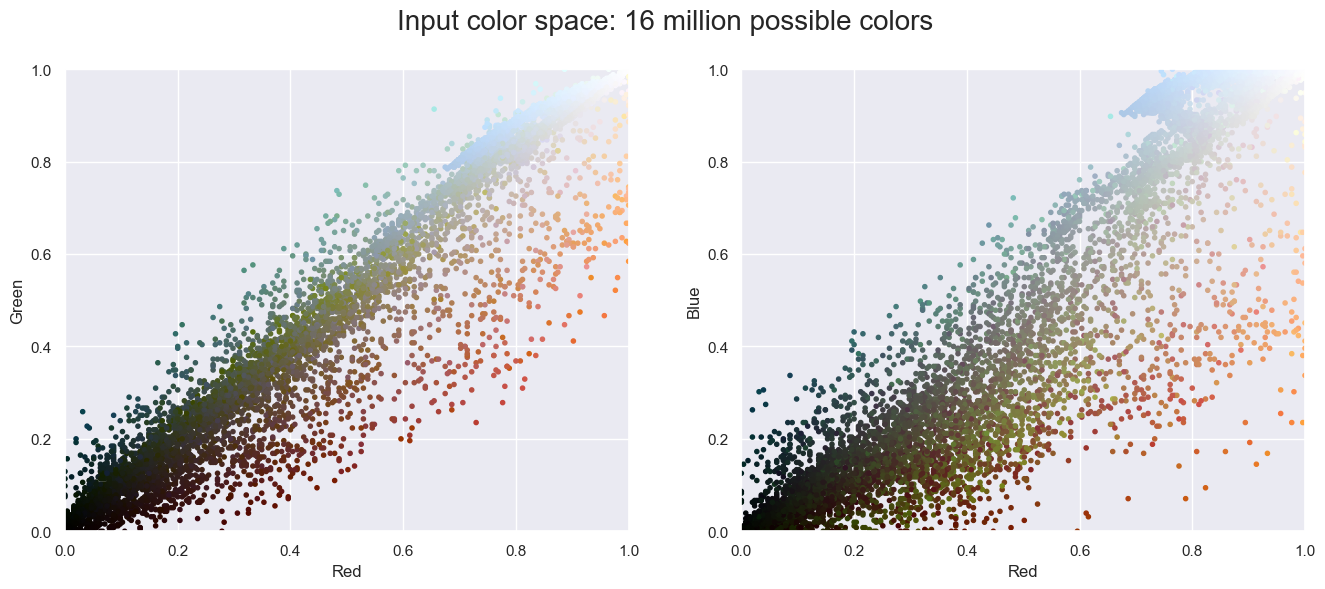

In [23]:
plot_pixels(data, title='Input color space: 16 million possible colors')

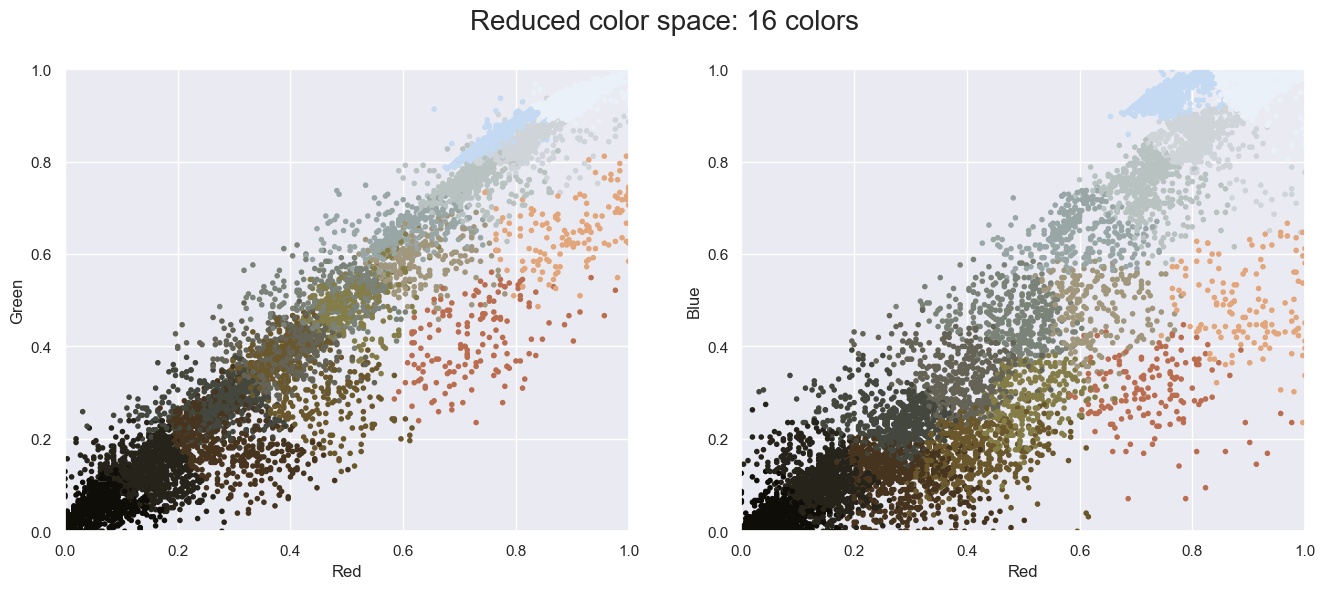

In [24]:
import warnings; warnings.simplefilter('ignore') # Fix Numpy Issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
           title="Reduced color space: 16 colors")

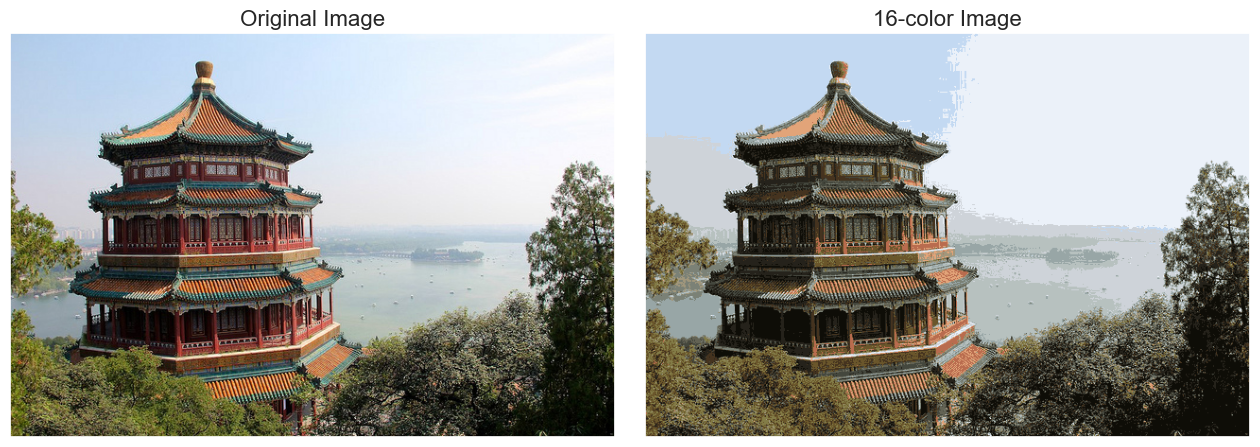

In [25]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                      subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0]. set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

In [27]:
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns = iris.feature_names)

target = iris.target_names
labels = iris.target

In [28]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [29]:
#PCA Transformation
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(data)
PCAdf = pd.DataFrame(data = principalComponents, columns = ['principal component 1',
                                                           'principal component 2', 'principal component 3'])
datapoints = PCAdf.values
m, f = datapoints.shape
k = 3

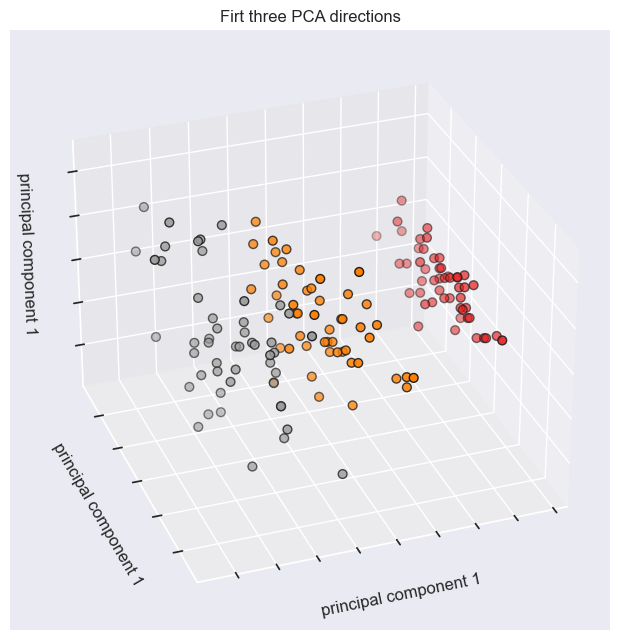

In [30]:
#Visualization
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = datapoints
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=labels,
          cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Firt three PCA directions")
ax.set_xlabel("principal component 1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("principal component 1")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("principal component 1")
ax.w_zaxis.set_ticklabels([])
plt.show()

In [31]:
def init_medoids(X, k):
    from numpy.random import choice
    from numpy.random import seed
    
    seed(1)
    samples = choice(len(X), size=k, replace=False)
    return X[samples, :]

medoids_inital = init_medoids(datapoints, 3)

In [103]:
def compute_d_p(X, medoids, p):
    
    m = len(X)
    medoids_shape = medoids.shape
    
    if len(medoids_shape) == 1:
        medoids = medoids.reshape((1, len(medoids)))
    k = len(medoids)
    
    S = np.empty((m, k))
    
    for i in range(m):
        d_i = np.linalg.norm(X[i, :] - medoids, ord=p, axis=1)
        S[i, :] = d_i**p
        
    return S

S = compute_d_p(datapoints, medoids_initial, 2)

def assign_labels(S):
    return np.argmin(S, axis=1)

labels = assign_labels(S)

NameError: name 'medoids_initial' is not defined

In [33]:
def assign_labels(S):
    return np.argmin(S, axis=1)

labels = assign_labels(S)

NameError: name 'S' is not defined

In [34]:
def update_medoids(X, medoids, p):
    
    S = compute_d_p(datapoints, medoids, p) 
    labels = assign_labels(S)
    
    out_medoids = medoids
    
    for i in set(labels):
        avg_dissimilarity = np.sum(compute_d_p(datapoints, medoids[i], p))
        
        cluster_points = datapoints[labels == i]
        
        for datap in cluster_points:
            new_medoids = datap
            new_medoid = datap
            new_dissimilarity = np.sum(compute_d_p(datapoints, datap, p))
            
            if new_dissimilarity < avg_dissimilarity :
                avg_dissimilarity = new_dissimilarity
                
                out_medoids[i] = datap
                
        return out_medoids

In [35]:
def has_converged(old_medoids, medoids):
    return set([tuple(x) for x in old_medoids]) == set([tuple(x) for x in medoids])

In [36]:
# Full Algorithm
def kmedoids(X, k, p, starting_medoids=None, max_steps=np.inf):
    if starting_medoids is None:
        medoids = init_medoids(X, k)
    else:
        medoids = starting_medoids
        
    converged = False
    labels = np.zeros(len(X))
    i = 1
    while (not converged) and (i <= max_steps):
        old_medoids = medoids.copy()
        
        S = compute_d_p(X, medoids, p)
        labels = assign_labels(S)
        medoids = update_medoids(X, medoids, p)
        converged = has_converged(old_medoids, medoids)
        i += 1
    return (medoids, labels)

results = kmedoids(datapoints, 3, 2)
final_medoids = results[0]
data['clusters'] = results[1]

In [37]:
#Count
def mark_matches(a, b, exact=False):
    assert a.shape == b.shape
    a_int = a.astype(dtype=int)
    b_int = b.astype(dtype=int)
    all_axes = tuple(range(len(a.shape)))
    assert ((a_int == 0) | (a_int == 1) | (a_int == 2)).all()
    assert ((b_int == 0) | (b_int == 1) | (b_int ==2)).all()
    
    exact_matches = (a_int == b_int)
    if exact:
        return exact_matches
    
    assert exact== False
    num_exact_matches = np.sum(exact_matches)
    if(2*num_exact_matches) >= np.prod (a.shape):
        return exact_matches
    return exact_matches == False #invert

In [38]:
def count_matches(a, b, exact=False):
    matches = mark_matches(a, b, exact=exact)
    return np.sum(matches)

n_matches = count_matches(labels, data['clusters'])
print(n_matches,
     "matches out of",
     len(data), "data points",
     "(- {:.1f}%)".format(100.0 * n_matches / len(labels)))

117 matches out of 150 data points (- 78.0%)


In [39]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

In [43]:
bank = pd.read_csv('C://Users//NB//.vscode//Machine Learning//Week 9//bankmarketing.csv')

In [44]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [45]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [47]:
bank_cust = bank[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                'contact', 'month', 'day_of_week', 'poutcome']]

In [48]:
bank_cust.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,37,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,56,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [49]:
bank_cust['age_bin'] = pd.cut(bank_cust['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                             labels=['0-20', '20-30', '30-40', '40-50', '50-60', '60-70',
                                    '70-80', '80-90', '90-100'])
bank_cust = bank_cust.drop('age', axis = 1)

In [50]:
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,50-60
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,50-60
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,30-40
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,30-40
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,50-60


In [51]:
bank_cust.shape

(41188, 11)

In [52]:
bank_cust.describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,9
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,30-40
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,16385


In [53]:
bank_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   job          41188 non-null  object  
 1   marital      41188 non-null  object  
 2   education    41188 non-null  object  
 3   default      41188 non-null  object  
 4   housing      41188 non-null  object  
 5   loan         41188 non-null  object  
 6   contact      41188 non-null  object  
 7   month        41188 non-null  object  
 8   day_of_week  41188 non-null  object  
 9   poutcome     41188 non-null  object  
 10  age_bin      41188 non-null  category
dtypes: category(1), object(10)
memory usage: 3.2+ MB


In [54]:
bank_cust.isnull().sum()*100/bank_cust.shape[0]

job            0.0
marital        0.0
education      0.0
default        0.0
housing        0.0
loan           0.0
contact        0.0
month          0.0
day_of_week    0.0
poutcome       0.0
age_bin        0.0
dtype: float64

In [55]:
bank_cust_copy = bank_cust.copy()

In [56]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
bank_cust = bank_cust.apply(le.fit_transform)
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,3,1,0,0,0,0,1,6,1,1,4
1,7,1,3,1,0,0,1,6,1,1,4
2,7,1,3,0,2,0,1,6,1,1,2
3,0,1,1,0,0,0,1,6,1,1,2
4,7,1,3,0,0,2,1,6,1,1,4


In [57]:
!pip install kmodes

In [58]:
pip install --upgrade kmodes

Note: you may need to restart the kernel to use updated packages.


In [59]:
from kmodes.kmodes import KModes

In [60]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5322, cost: 192203.0
Run 1, iteration: 2/100, moves: 1160, cost: 192203.0


In [61]:
fitClusters_cao

array([1, 1, 0, ..., 0, 1, 0], dtype=uint16)

In [62]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = bank_cust.columns

In [63]:
clusterCentroidsDf

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,0,1,6,0,2,0,0,6,2,1,2
1,1,1,3,0,0,0,1,6,0,1,3


In [68]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 10006, cost: 200472.0
Run 1, iteration: 2/100, moves: 5963, cost: 196936.0
Run 1, iteration: 3/100, moves: 1510, cost: 196936.0


In [69]:
fitClusters_huang

array([1, 1, 0, ..., 0, 0, 0], dtype=uint16)

In [71]:
cost = []
for num_clusters in list(range(1, 5)):
    kmode = KModes(n_clusters=num_clusters, init="Cao", n_init=1, verbose=1)
    kmode.fit_predict(bank_cust)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 216952.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5322, cost: 192203.0
Run 1, iteration: 2/100, moves: 1160, cost: 192203.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4993, cost: 185138.0
Run 1, iteration: 2/100, moves: 1368, cost: 185138.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6186, cost: 179774.0
Run 1, iteration: 2/100, moves: 1395, cost: 179774.0


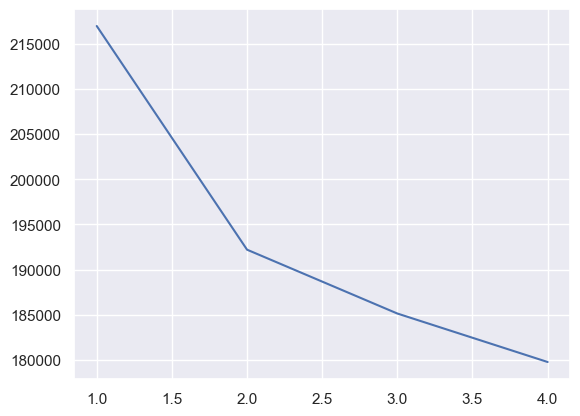

In [72]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y, cost)

In [73]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5322, cost: 192203.0
Run 1, iteration: 2/100, moves: 1160, cost: 192203.0


In [74]:
fitClusters_cao

array([1, 1, 0, ..., 0, 1, 0], dtype=uint16)

In [75]:
 bank_cust = bank_cust_copy.reset_index()

In [79]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
clustersDf = pd.concat([bank_cust, clustersDf], axis=1).reset_index()
clustersDf = clustersDf.drop(['index', 'level_0'], axis=1)

In [82]:
# combinedDf.head()
clustersDf.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin,cluster_predicted
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,50-60,1
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,50-60,1
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,30-40,0
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,30-40,0
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,50-60,1


In [84]:
cluster_0 = clustersDf[clustersDf['cluster_predicted'] == 0]
cluster_1 = clustersDf[clustersDf['cluster_predicted'] == 1]

In [85]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28293 entries, 2 to 41187
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   job                28293 non-null  object  
 1   marital            28293 non-null  object  
 2   education          28293 non-null  object  
 3   default            28293 non-null  object  
 4   housing            28293 non-null  object  
 5   loan               28293 non-null  object  
 6   contact            28293 non-null  object  
 7   month              28293 non-null  object  
 8   day_of_week        28293 non-null  object  
 9   poutcome           28293 non-null  object  
 10  age_bin            28293 non-null  category
 11  cluster_predicted  28293 non-null  uint16  
dtypes: category(1), object(10), uint16(1)
memory usage: 2.5+ MB


In [86]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12895 entries, 0 to 41186
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   job                12895 non-null  object  
 1   marital            12895 non-null  object  
 2   education          12895 non-null  object  
 3   default            12895 non-null  object  
 4   housing            12895 non-null  object  
 5   loan               12895 non-null  object  
 6   contact            12895 non-null  object  
 7   month              12895 non-null  object  
 8   day_of_week        12895 non-null  object  
 9   poutcome           12895 non-null  object  
 10  age_bin            12895 non-null  category
 11  cluster_predicted  12895 non-null  uint16  
dtypes: category(1), object(10), uint16(1)
memory usage: 1.1+ MB


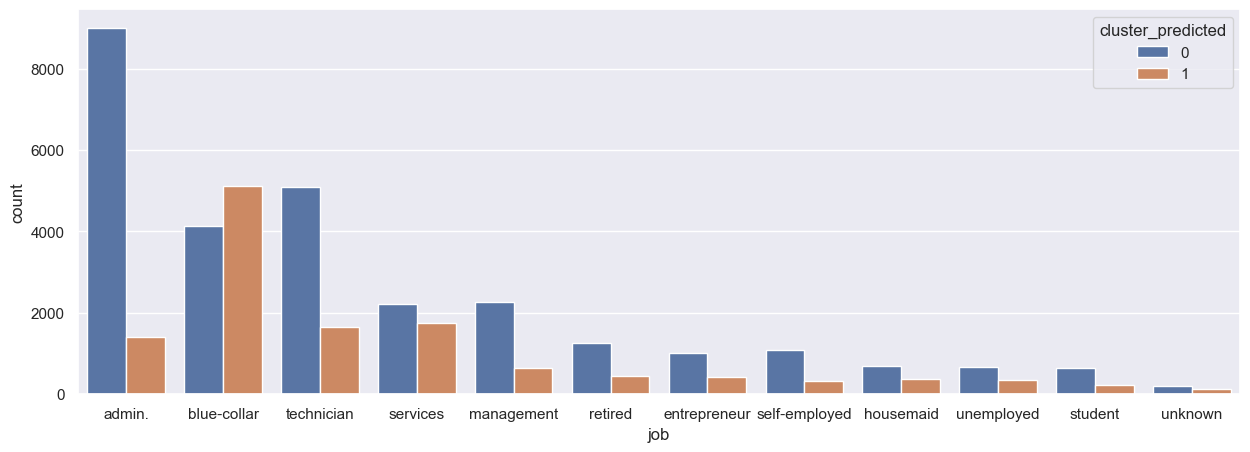

In [88]:
plt.subplots(figsize = (15,5))
sns.countplot(x=clustersDf['job'],
             order=clustersDf['job'].value_counts().index,hue=clustersDf['cluster_predicted'])
plt.show()

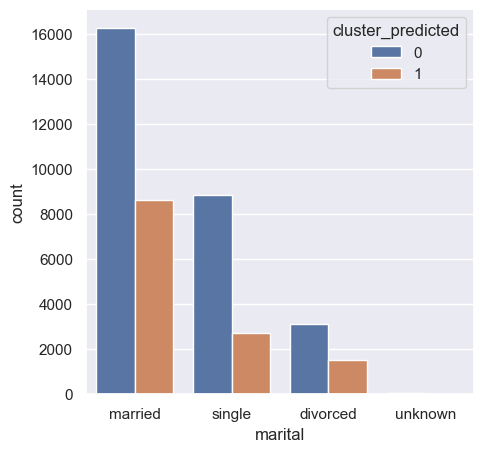

In [92]:
plt.subplots(figsize=(5, 5))
sns.countplot(x=clustersDf['marital'],
             order=clustersDf['marial'].value_counts().index, hue=clustersDf['cluster_predicted'])
plt.show()


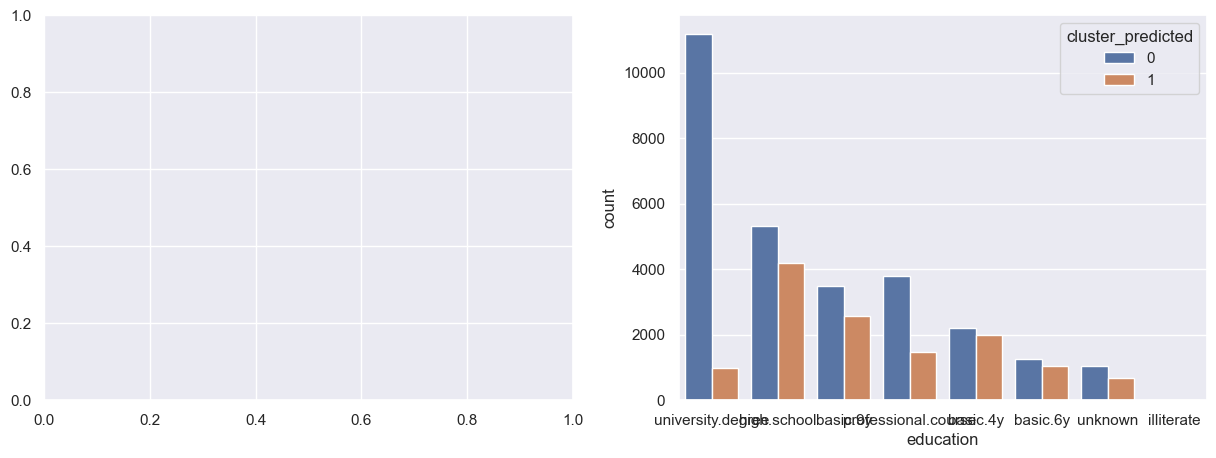

In [94]:
plt.subplots(1, 2, figsize = (15,5))
sns.countplot(x=clustersDf['education'],
             order=clustersDf['education'].value_counts().index,hue=clustersDf['cluster_predicted'])
plt.show()

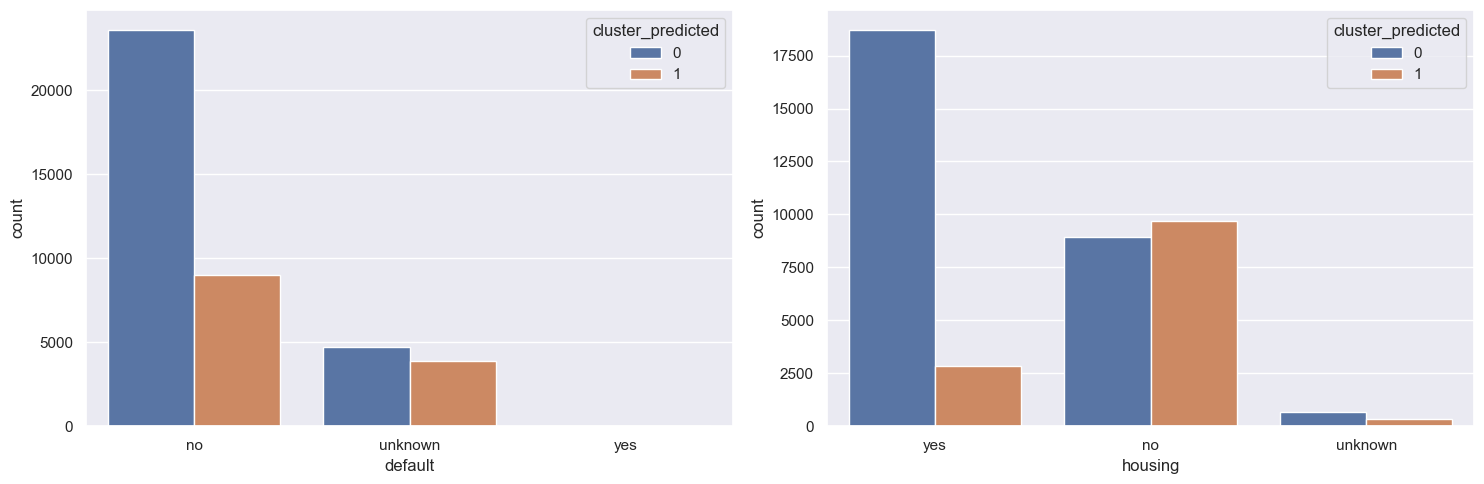

In [96]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x=clustersDf['default'],
             order=clustersDf['default'].value_counts().index, hue=clustersDf['cluster_predicted'], ax=axs[0])
sns.countplot(x=clustersDf['housing'],
             order=clustersDf['housing'].value_counts().index, hue=clustersDf['cluster_predicted'], ax=axs[1])

plt.tight_layout()
plt.show()


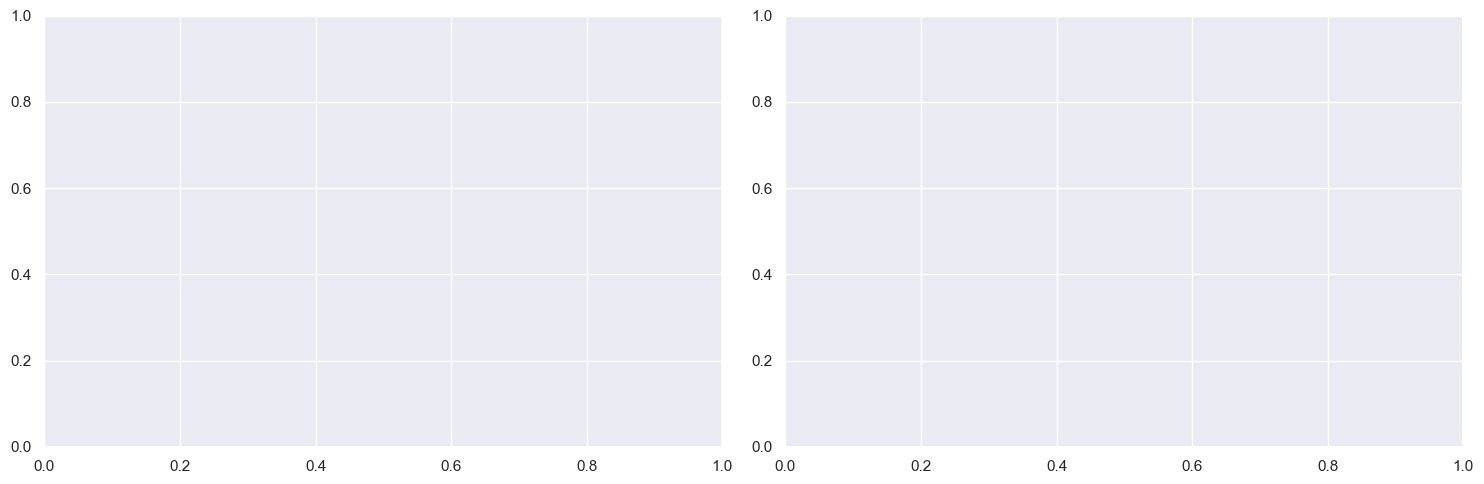

In [97]:
plt.subplots(1, 2, figsize = (15,5))
sns.countplot(x=clustersDf['month'],
             order=clustersDf['month'].value_counts().index,hue=clustersDf['cluster_predicted'], ax=axs[0])
sns.countplot(x=clustersDf['day_of_week'],
             order=clustersDf['day_of_week'].value_counts().index,hue=clustersDf['cluster_predicted'], ax=axs[1])

plt.tight_layout()
plt.show()

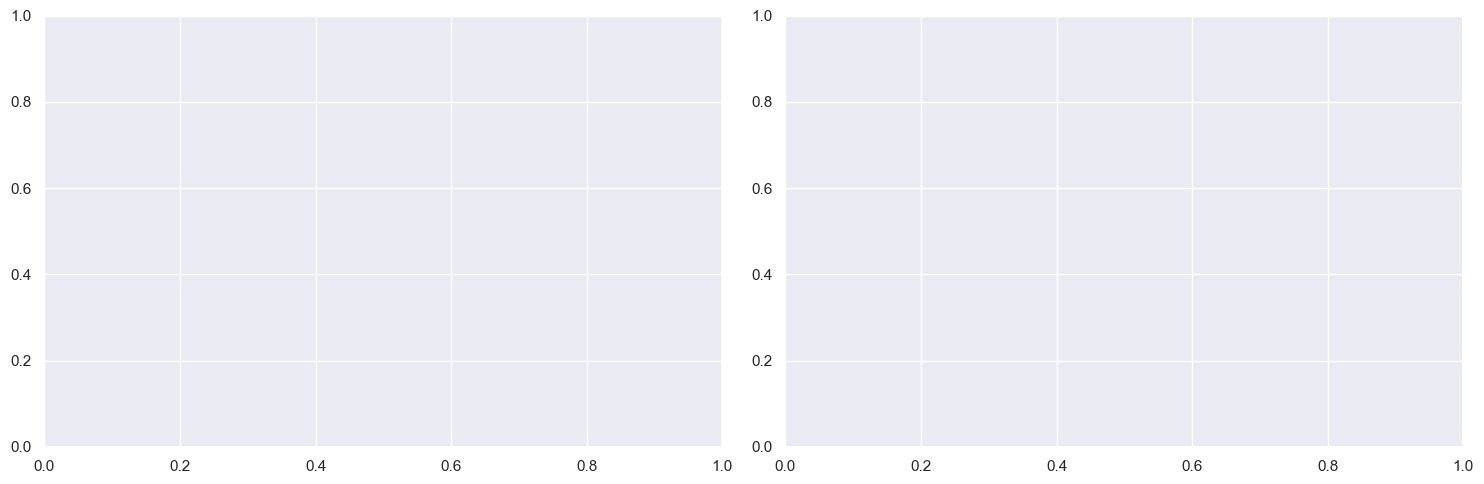

In [99]:
plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x=clustersDf['poutcome'],
             order=clustersDf['poutcome'].value_counts().index, hue=clustersDf['cluster_predicted'], ax=axs[0])
sns.countplot(x=clustersDf['age_bin'],
             order=clustersDf['age_bin'].value_counts().index, hue=clustersDf['cluster_predicted'], ax=axs[1])

plt.tight_layout()
plt.show()


### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

#### Dataset US Crime Rates 1960 - 2014:

- Dataset ini mencakup data tingkat kejahatan di Amerika Serikat dari tahun 1960 hingga 2014.
- Dataset ini cocok untuk analisis tren dan perbandingan tingkat kejahatan selama beberapa dekade.
- Variabel-variabelnya mencakup jumlah kejahatan, tingkat kejahatan, tingkat kejahatan proporsional, dan banyak variabel lainnya.

#### Customer Segmentation Classification:

- Dataset ini digunakan untuk tujuan segmentasi pelanggan berdasarkan karakteristik dan perilaku.
- Pengelompokan pelanggan dapat membantu perusahaan memahami preferensi pelanggan dan menyesuaikan strategi pemasaran.
- Variabel-variabel dalam dataset mencakup demografi, histori pembelian, preferensi produk, dan sebagainya.
- Algoritma partisi seperti k-means atau k-medoids dapat digunakan untuk mengelompokkan pelanggan ke dalam segmen yang relevan.






In [100]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t{}".format(myName))
print("NIM: \t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 	Steven Indriano
NIM: 	57217
Time-stamp:	2023-11-06 22:59:46.185133


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [104]:
!jupyter nbconvert --to html "./IF540L_kelas_C_laporan_M09_00000057217_StevenIndriano.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./IF540L_kelas_C_laporan_M09_00000057217_StevenIndriano.ipynb to html
[NbConvertApp] Writing 4132588 bytes to IF540L_kelas_C_laporan_M09_00000057217_StevenIndriano.html


### Next step:
* convert the generated html file to PDF using the online tool: https://www.sejda.com/html-to-pdf
* choose the following settings:
    * Page size: One long page
    * Page Orientation: auto
    * Use print stylesheet
* Submit your ipython notebook and PDF files

Markdown basics https://markdown-guide.readthedocs.io/en/latest/basics.html#